# Keras
Librería para programar redes neuronales de una manera más sencilla que con TensorFlow. Keras se encuentra en una capa de abstracción por encima de TensorFlow.

[Documentación](https://keras.io/guides/)

In [228]:
# !pip install tensorflow
# !pip install keras

Empezamos importando librerías

In [229]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
import numpy as np

Cargamos los datos de mnist. No vamos a tratar imagenes con redes convolucionales (perdemos la estructura espacial 2D). Todos los pixeles se convertirán en un vector de 28x28 features independientes, que serán las entradas del modelo.

In [296]:
# Cogemos las imágenes de los dígitos asi como el conjunto de train y test
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

Vemos dimensiones del dataset

In [231]:
'''
60.000 imagenes de 28x28 pixeles
'''
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [232]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

60.000 imágenes de 28x28 pixeles. Vamos a representar una de ellas

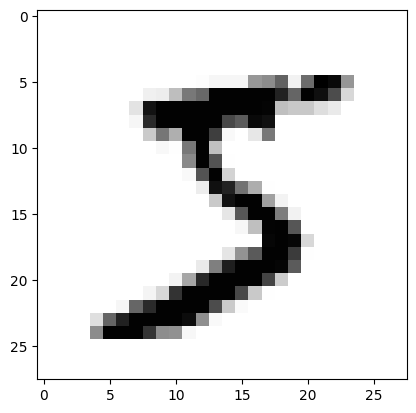

In [233]:
import matplotlib.pyplot as plt

plt.imshow(X_train[0], cmap=plt.cm.get_cmap('Greys'));

Cada imagen se compone de 28x28 pixeles, y cada pixel representa una escala de grises que va del 0 al 255. Siendo 0 el blanco y 255 negro.

¿Se te ocurre alguna manera de normalizar los datos?

In [234]:
0/255

0.0

In [235]:
128/255

0.5019607843137255

In [236]:
255/255

1.0

In [237]:
X_train = X_train.astype("float32")/255
X_test = X_test.astype("float32")/255

In [238]:
np.mean(X_train)

0.13066062

In [239]:
'''
Comprobamos la normalización
'''
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [240]:
y_train = y_train.astype("float32")
y_test = y_test.astype("float32")

Guardamos datos para validación. Estos datos se usarán durante el entrenamiento. Otra opción es decirle a keras en la etapa de entrenamiento que reserve un X % de los datos para validar.

In [241]:
X_val = X_train[-10000:]
y_val = y_train[-10000:]

X_train = X_train[:-10000]
y_train = y_train[:-10000]

In [242]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(50000, 28, 28)
(10000, 28, 28)
(10000, 28, 28)


Montamos la arquitectura de la red neuronal. Se va a componer de:
* **Sequential**: API para iniciar la red neuronal. No cuenta como capa.
* **Flatten**: capa de entrada. Necesita un vector unidimensional. Como tenemos imágenes, esta capa aplana las imagenes (2D) en 1D.
* **Dense**: es una hidden layer. Se compondrá de `n` neuronas y de una función de activación que se aplicará a todas las neuronas de la capa.

Recuerda que es un problema de clasificación multiclase (10 clases) y que por tanto la última capa se compondrá de tantas neuronas como clases tengas.

En cuanto a las funciones de activación es recomendable usar relu en las hidden layer, que tarda menos en entrenar, mientras que la ultima (output) suele ser una softmax.

In [243]:
28*28

784

In [244]:
model = keras.models.Sequential()

# Capa entrada
model.add(keras.layers.Flatten(input_shape=(28, 28)))

# Hidden layer
model.add(keras.layers.Dense(units = 300,
                            activation='relu'))

# Hidden layer
model.add(keras.layers.Dense(units = 100,
                            activation='relu'))

# Capa salida
model.add(keras.layers.Dense(units = 10,
                            activation='softmax'))

In [245]:
# Otra manera de declarar la red neuronal
capas = [
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(units = 300, activation='relu'),
    keras.layers.Dense(units = 100, activation='relu'),
    keras.layers.Dense(units = 10, activation='softmax')
]

model = keras.models.Sequential(capas)

Podemos ver las capas, y acceder a sus elementos

In [246]:
print(model.layers[0])

Podemos ver los pesos de las capas sin entrenar, porque los inicializa aleatoriamente. Los bias los inicializa a 0.

In [247]:
hidden1 = model.layers[1]
weights, biases = hidden1.get_weights()

In [248]:
weights

array([[-0.01044052, -0.02335217,  0.01352949, ...,  0.0233091 ,
        -0.00397924, -0.03597845],
       [ 0.04827032, -0.04822433,  0.07288791, ..., -0.01021906,
         0.04363696,  0.06739831],
       [ 0.00223774,  0.00786018, -0.03518424, ...,  0.07092929,
         0.02169018,  0.0198878 ],
       ...,
       [-0.01052942, -0.05825156, -0.07182381, ..., -0.05161282,
         0.01383293,  0.02191482],
       [ 0.0407074 ,  0.05645561, -0.02910429, ...,  0.0723799 ,
         0.07329512, -0.02436209],
       [ 0.0195272 , -0.00571349, -0.03917728, ..., -0.07105692,
         0.04096463,  0.00935932]], dtype=float32)

In [249]:
len(weights[0])

300

In [250]:
28*28

784

In [251]:
300*784

235200

In [252]:
weights.size

235200

In [253]:
len(biases)

300

Establecemos la configuración de ejecución... el compile.

In [254]:
model.compile(
    optimizer = keras.optimizers.SGD(),
    loss = keras.losses.SparseCategoricalCrossentropy(),
    metrics = [keras.metrics.SparseCategoricalAccuracy()]
)

In [255]:
# Equivalente
model.compile(
    optimizer = "sgd",
    loss = "sparse_categorical_crossentropy",
    metrics = ["accuracy"]
)

In [256]:
# Summary
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_9 (Flatten)         (None, 784)               0         
                                                                 
 dense_33 (Dense)            (None, 300)               235500    
                                                                 
 dense_34 (Dense)            (None, 100)               30100     
                                                                 
 dense_35 (Dense)            (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [257]:
# 1º neurona de la 1º hidden layer
# y = a + w1*x1 + w2*x2 + .... wn*xn
# a es el intercepto llamado bias
# wn es cada uno de los pesos que va a ir actualizando con el backpropagation
# n es 784
# En la 1º hidden layer tenemos 784 pesos por cada neurona, al tener 300, tenemos un total de:
print(784*300 + 300)

235500


In [258]:
300 * 784 + 300

235500

In [259]:
300 * 100 + 100

30100

In [260]:
100 * 10 + 10

1010

Entrenamos el modelo. Usamos los datos de entrenamiento. El batch_size es la cantidad de muestras que utiliza el SGD, y las epochs son las iteraciones que realiza en el entrenamiento.

In [261]:
X_train.shape

(50000, 28, 28)

In [262]:
40000/128

312.5

In [263]:
history = model.fit(
    X_train,
    y_train,
    batch_size = 128,
    epochs = 50,
    validation_data = (X_val, y_val) # validation_split = 0.1
)

Epoch 1/50
153/391 [==========>...................] - ETA: 1s - loss: 1.7832 - accuracy: 0.5376

391/391 [==============================] - 2s 5ms/step - loss: 1.2322 - accuracy: 0.7009 - val_loss: 0.5980 - val_accuracy: 0.8615
Epoch 2/50
391/391 [==============================] - 2s 4ms/step - loss: 0.5144 - accuracy: 0.8699 - val_loss: 0.3934 - val_accuracy: 0.8985
Epoch 3/50
391/391 [==============================] - 2s 4ms/step - loss: 0.3980 - accuracy: 0.8930 - val_loss: 0.3340 - val_accuracy: 0.9075
Epoch 4/50
391/391 [==============================] - 2s 4ms/step - loss: 0.3498 - accuracy: 0.9025 - val_loss: 0.3033 - val_accuracy: 0.9155
Epoch 5/50
391/391 [==============================] - 2s 5ms/step - loss: 0.3202 - accuracy: 0.9096 - val_loss: 0.2824 - val_accuracy: 0.9209
Epoch 6/50
391/391 [==============================] - 2s 5ms/step - loss: 0.2992 - accuracy: 0.9147 - val_loss: 0.2680 - val_accuracy: 0.9256
Epoch 7/50
391/391 [==============================] - 2s 5ms/step - loss: 0.2820 - accuracy: 0.9200 - val_loss: 0.2538 - val_accuracy: 0.9286
Epoch 8/50
391/39

Podemos reentrenar el modelo. No empieza de nuevo, sino que retoma el entrenamiento anterior.

In [264]:
model.fit(
    X_train,
    y_train,
    batch_size = 64,
    epochs = 10,
    validation_data = (X_val, y_val) # validation_split = 0.1
)

Epoch 1/10
  1/782 [..............................] - ETA: 6s - loss: 0.0569 - accuracy: 0.9688

782/782 [==============================] - 3s 4ms/step - loss: 0.0854 - accuracy: 0.9760 - val_loss: 0.1070 - val_accuracy: 0.9701
Epoch 2/10
782/782 [==============================] - 3s 4ms/step - loss: 0.0825 - accuracy: 0.9770 - val_loss: 0.1047 - val_accuracy: 0.9709
Epoch 3/10
782/782 [==============================] - 3s 4ms/step - loss: 0.0794 - accuracy: 0.9786 - val_loss: 0.1045 - val_accuracy: 0.9716
Epoch 4/10
782/782 [==============================] - 3s 4ms/step - loss: 0.0766 - accuracy: 0.9790 - val_loss: 0.1014 - val_accuracy: 0.9718
Epoch 5/10
782/782 [==============================] - 3s 4ms/step - loss: 0.0739 - accuracy: 0.9799 - val_loss: 0.1002 - val_accuracy: 0.9710
Epoch 6/10
782/782 [==============================] - 2s 3ms/step - loss: 0.0711 - accuracy: 0.9805 - val_loss: 0.0972 - val_accuracy: 0.9719
Epoch 7/10
782/782 [==============================] - 3s 3ms/step - loss: 0.0688 - accuracy: 0.9813 - val_loss: 0.0978 - val_accuracy: 0.9730
Epoch 8/10
782/78

Veamos el histórico del entrenamiento, para poder representarlo posteriormente.

In [265]:
# print(history.params)
# print(history.epoch)
print(history.history)

{'loss': [1.2322297096252441, 0.5144044160842896, 0.3980308175086975, 0.3497876822948456, 0.3201920986175537, 0.2992238402366638, 0.28197261691093445, 0.26776278018951416, 0.25514671206474304, 0.2442764788866043, 0.23416824638843536, 0.22506146132946014, 0.21667872369289398, 0.2089259773492813, 0.20183949172496796, 0.19518093764781952, 0.18892788887023926, 0.18322047591209412, 0.1776866763830185, 0.17241936922073364, 0.16760402917861938, 0.16305063664913177, 0.1584962010383606, 0.15429584681987762, 0.15017452836036682, 0.14624923467636108, 0.14260447025299072, 0.1389988511800766, 0.1356576830148697, 0.13242775201797485, 0.12925119698047638, 0.12616755068302155, 0.1232941597700119, 0.12054162472486496, 0.11771446466445923, 0.11521658301353455, 0.11262615025043488, 0.11007975786924362, 0.10792895406484604, 0.10534991323947906, 0.10345388948917389, 0.10112012922763824, 0.09890007972717285, 0.09700848907232285, 0.09500685334205627, 0.09318669140338898, 0.09122747927904129, 0.08955045789480

In [266]:
history.history

{'loss': [1.2322297096252441,
  0.5144044160842896,
  0.3980308175086975,
  0.3497876822948456,
  0.3201920986175537,
  0.2992238402366638,
  0.28197261691093445,
  0.26776278018951416,
  0.25514671206474304,
  0.2442764788866043,
  0.23416824638843536,
  0.22506146132946014,
  0.21667872369289398,
  0.2089259773492813,
  0.20183949172496796,
  0.19518093764781952,
  0.18892788887023926,
  0.18322047591209412,
  0.1776866763830185,
  0.17241936922073364,
  0.16760402917861938,
  0.16305063664913177,
  0.1584962010383606,
  0.15429584681987762,
  0.15017452836036682,
  0.14624923467636108,
  0.14260447025299072,
  0.1389988511800766,
  0.1356576830148697,
  0.13242775201797485,
  0.12925119698047638,
  0.12616755068302155,
  0.1232941597700119,
  0.12054162472486496,
  0.11771446466445923,
  0.11521658301353455,
  0.11262615025043488,
  0.11007975786924362,
  0.10792895406484604,
  0.10534991323947906,
  0.10345388948917389,
  0.10112012922763824,
  0.09890007972717285,
  0.097008489072

In [267]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [268]:
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,1.232230,0.70094,0.598015,0.8615
1,0.514404,0.86986,0.393437,0.8985
2,0.398031,0.89302,0.333958,0.9075
3,0.349788,0.90250,0.303324,0.9155
4,0.320192,0.90962,0.282355,0.9209
5,0.299224,0.91466,0.267959,0.9256
6,0.281973,0.92000,0.253849,0.9286
7,0.267763,0.92416,0.245519,0.9308
8,0.255147,0.92808,0.234334,0.9336
9,0.244276,0.93082,0.224844,0.9357


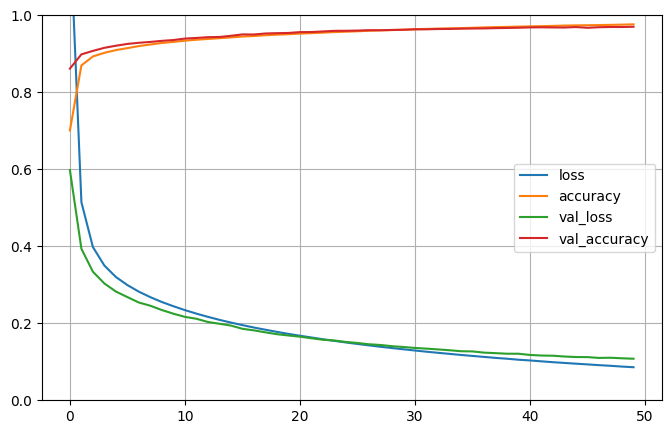

In [269]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

Si el modelo no ha ido bien, prueba a cambiar el learning rate, cambia de optimizador y después prueba a cambiar capas, neuronas y funciones de activación.

Ya tenemos el modelo entrenado. Probémoslo con test

In [270]:
results = model.evaluate(X_test, y_test)
results

  1/313 [..............................] - ETA: 7s - loss: 0.1589 - accuracy: 0.9688

313/313 [==============================] - 1s 2ms/step - loss: 0.0906 - accuracy: 0.9743


[0.09064123034477234, 0.9743000268936157]

In [271]:
X_test[0].shape

(28, 28)

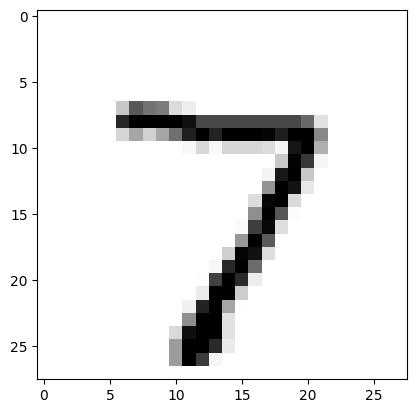

In [272]:
# Cogemos el primero
plt.imshow(X_test[0].reshape(28,28), cmap=plt.cm.get_cmap('Greys'));

In [273]:
X_test[:1]

array([[[0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.

In [274]:
predictions = model.predict(X_test[:1])
print(predictions.shape)
predictions

1/1 [==============================] - 0s 64ms/step
(1, 10)


array([[1.4565873e-05, 8.3954967e-07, 2.7546581e-04, 1.2106355e-03,
        2.2051987e-07, 8.8751576e-06, 6.7844652e-10, 9.9824309e-01,
        4.2546959e-05, 2.0381836e-04]], dtype=float32)

In [275]:
predictions.argmax()

7

In [276]:
model.predict(X_test).argmax(axis=1)

  1/313 [..............................] - ETA: 7s

313/313 [==============================] - 1s 2ms/step


array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

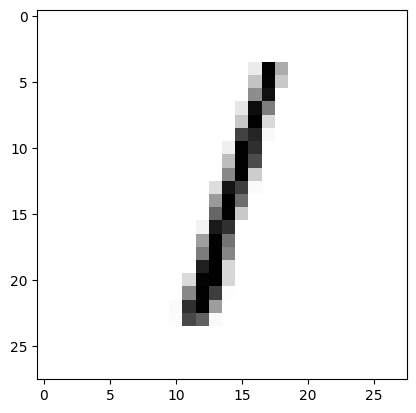

In [277]:
plt.imshow(X_test[2].reshape(28,28), cmap=plt.cm.get_cmap('Greys'));

### Problema de regresión
Veamos un ejemplo de cómo aplicar una red neuronal de TensorFlow a un problema de regresión.

In [298]:
# Cargamos datos
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
df = pd.DataFrame(housing.data, columns = housing.feature_names)
df['target'] = housing['target']
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


Divimos en train, test y validation

In [299]:
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data,
                                                              housing.target)

X_train, X_valid, y_train, y_valid = train_test_split(X_train_full,
                                                      y_train_full)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [280]:
X_train.shape

(11610, 8)

Montamos el modelo. Simplemente se compondrá de una hidden layer, a la que le configuramos una capa previa de entrada de 8 neuronas (las features).

Se trata de un modelo de regresión, por lo que la capa de salida es una única neurona.

In [281]:
11610/32

362.8125

In [282]:
X_train.shape[1:]

(8,)

In [283]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation = 'relu',
                      input_shape = X_train.shape[1:]),
    keras.layers.Dense(1)
])

model.compile(loss = "mean_squared_error",
             optimizer = "sgd")

history = model.fit(X_train,
                   y_train,
                   epochs = 20,
                   validation_data = (X_valid, y_valid))

Epoch 1/20


363/363 [==============================] - 1s 2ms/step - loss: 0.8701 - val_loss: 0.7085
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 1.0147 - val_loss: 0.5066
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4663 - val_loss: 1.9258
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 57.5416 - val_loss: 0.6836
Epoch 5/20
363/363 [==============================] - 1s 1ms/step - loss: 0.5333 - val_loss: 0.4865
Epoch 6/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4735 - val_loss: 0.4423
Epoch 7/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4387 - val_loss: 0.4305
Epoch 8/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4248 - val_loss: 0.4125
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4152 - val_loss: 0.4125
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4078 - val_loss: 0.4032
Epoch 11/

In [284]:
8*30 + 30

270

In [285]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 30)                270       
                                                                 
 dense_37 (Dense)            (None, 1)                 31        
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [286]:
mse_test = model.evaluate(X_test, y_test)
print(mse_test)

 37/162 [=====>........................] - ETA: 0s - loss: 0.3864

162/162 [==============================] - 0s 2ms/step - loss: 0.3831
0.3830752968788147


In [287]:
y_pred = model.predict(X_test[:5])
y_pred

1/1 [==============================] - 0s 48ms/step


array([[0.60995984],
       [1.4618496 ],
       [0.82463926],
       [1.645638  ],
       [3.4018385 ]], dtype=float32)

### Guardar modelo
Para guardar el modelo, en el formato de Keras (HDF5). 

In [288]:
model.save("my_keras_model.h5")

In [289]:
# Lo volvemos a cargar
model = keras.models.load_model("my_keras_model.h5")

### Callbacks
Son funciones predefinidas de Keras a aplicar durante el entrenamiento
Por ejemplo, `ModelCheckpoint` sirve para que el modelo se vaya guardando tras cada epoch. Así no perdemos el progreso en caso de que decidamos interrumpir el entrenamiento. El callback recibe como argumento el nombre del objeto donde queremos que se guarde el modelo entrenado.

In [300]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("callback_model.h5")
history = model.fit(X_train,
                   y_train,
                   epochs=30,
                   callbacks = [checkpoint_cb])

Epoch 1/30
363/363 [==============================] - 2s 3ms/step - loss: 0.3571
Epoch 2/30
363/363 [==============================] - 1s 3ms/step - loss: 0.3336
Epoch 3/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3307
Epoch 4/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3289
Epoch 5/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3299
Epoch 6/30
363/363 [==============================] - 1s 3ms/step - loss: 0.3340
Epoch 7/30
363/363 [==============================] - 1s 3ms/step - loss: 0.3265
Epoch 8/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3296
Epoch 9/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3275
Epoch 10/30
363/363 [==============================] - 1s 2ms/step - loss: 0.3256
Epoch 11/30
363/363 [==============================] - 1s 3ms/step - loss: 0.3225
Epoch 12/30
363/363 [==============================] - 1s 3ms/step - loss: 0.3224
Epoch 13/30
363/363 [====

In [302]:
model = keras.models.load_model("callback_model.h5")

In [303]:
model.evaluate(X_train, y_train)

363/363 [==============================] - 1s 2ms/step - loss: 0.3095


0.3094663619995117

### Early Stopping
Interrumpe el entrenamiento cuando no ve progreso en el set de validación. Para ello tiene en cuenta un numero de epochs llamado `patience`. Se puede combinar con el callback

In [291]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5)
history = model.fit(X_train,
                   y_train,
                   epochs=50,
                   validation_data = (X_valid, y_valid),
                   callbacks = [early_stopping_cb])

Epoch 1/50
363/363 [==============================] - 1s 2ms/step - loss: 0.3345 - val_loss: 0.3245
Epoch 2/50
363/363 [==============================] - 1s 2ms/step - loss: 0.3349 - val_loss: 0.3269
Epoch 3/50
363/363 [==============================] - 1s 2ms/step - loss: 0.3326 - val_loss: 0.3213
Epoch 4/50
363/363 [==============================] - 1s 2ms/step - loss: 0.3336 - val_loss: 0.3268
Epoch 5/50
363/363 [==============================] - 1s 1ms/step - loss: 0.3308 - val_loss: 0.3507
Epoch 6/50
363/363 [==============================] - 1s 2ms/step - loss: 0.3287 - val_loss: 0.3263
Epoch 7/50
363/363 [==============================] - 1s 2ms/step - loss: 0.3287 - val_loss: 0.3195
Epoch 8/50
363/363 [==============================] - 1s 2ms/step - loss: 0.3276 - val_loss: 0.3190
Epoch 9/50
363/363 [==============================] - 1s 2ms/step - loss: 0.3282 - val_loss: 0.3632
Epoch 10/50
363/363 [==============================] - 1s 2ms/step - loss: 0.3271 - val_loss: 0.3252